# Evaluating Signal-Based Stock Rankings in 2008

## Project Goal

The goal of this project was to explore whether stock signals can help identify better-performing stocks, especially in challenging market environments like 2008. 

I tested three signals from the Open Asset Pricing dataset:
- AM, AOP, AnalystRevision


## Two main datasets provided by the Open Asset Pricing project and CRSP:

- **signal2008_sample.csv**  
  A sample dataset containing monthly signal values for a subset of individual stocks in 2008.  
  This file includes a wide range of predictive signals used to rank stocks each month.

- **crsp_2008_2023_rets.csv**  
  A dataset containing monthly returns for individual stocks from 2008 to 2023.  
  This data was merged with the signal rankings using stock identifiers (permno) and monthly dates to evaluate how signal-based rankings related to actual performance.

## Methodology

1. I used a sample of stock signal data from 2008.
2. I ranked stocks each month based on each signal.
3. I merged in return data from CRSP to evaluate actual performance.
4. I grouped stocks into five equal groups based on their signal rank.
5. I compared the average return of the top 20% (Quantile 5) and bottom 20% (Quantile 1) for each signal.
6. I visualized the results using bar charts.

## Key Findings

- AM signal showed the most consistent results: higher-ranked stocks had smaller losses, suggesting it may have helped reduce downside risk in 2008.
- AOP signal had no clear pattern and inconsistent performance.
- AnalystRevision signal performed poorly — top-ranked stocks had the worst returns.

These results suggest that not all signals are reliable in turbulent markets. However, the AM signal may offer some value in helping a portfolio manager avoid underperforming stocks.


## Conclusion

While not all signals were useful, this project demonstrates how quantitative techniques can be used to evaluate investment strategies. It also shows the importance of testing signals in different market environments before using them in real portfolios.

In [25]:
# Set up 
import pandas as pd 
import numpy as np 

## Step 1: Load and Preview 2008 Signal Sample Data

In this step, I load the `signal2008_sample.csv` file to preview the structure of the dataset and inspect what signals are available. This helps me choose which ones I want to analyze in more detail.

I used a small sample file first because it’s faster and easier to test with.

In [26]:
url = 'https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/signal2008_sample.csv'

df_2008 = pd.read_csv(url)
df_2008.head()

,permno,yyyymm,AM,AOP,Accruals,AccrualsBM,Activism1,Activism2,AgeIPO,AnalystRevision,...,realestate,retConglomerate,roaq,sfe,skew1,std_turn,tang,zerotrade,zerotradeAlt12,date
0,10032,200801,0.763326,0.52434,-0.014848,NaN,NaN,NaN,NaN,0.994737,...,NaN,NaN,0.029746,NaN,-0.056691,NaN,0.785901,8.105539e-09,7.338935e-09,2008-01-31
1,10032,200802,0.695966,0.52434,-0.014848,NaN,NaN,NaN,NaN,0.994709,...,NaN,NaN,0.029746,NaN,-0.048161,NaN,0.785901,8.819205e-09,7.487527e-09,2008-02-29
2,10032,200803,0.748897,0.52434,-0.032580,NaN,NaN,NaN,NaN,1.021277,...,NaN,NaN,0.029770,NaN,-0.058780,NaN,0.774756,8.235955e-09,7.822338e-09,2008-03-31
3,10032,200804,0.872003,0.52434,-0.032580,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,0.029770,NaN,-0.037279,NaN,0.774756,7.870446e-09,8.027040e-09,2008-04-30
4,10032,200805,0.765690,0.52434,-0.032580,NaN,NaN,NaN,NaN,0.973958,...,NaN,NaN,0.029770,NaN,NaN,NaN,0.774756,8.003802e-09,7.926766e-09,2008-05-31


## Step 2: Pick Clean Signals and Rank Stocks
 In this step, I will rank stocks by each signal within each month to prepare for analyzing their return performance.

In [27]:
df_ranked = df_2008.copy()

# List of signals to rank
signals_to_rank = ['AM', 'AOP', 'AnalystRevision']

# Rank each stock by signal within each month (higher = better rank)
for signal in signals_to_rank:
    df_ranked[f'{signal}_rank'] = df_ranked.groupby('yyyymm')[signal].rank(method='first', ascending=False)

df_ranked[['permno', 'yyyymm'] + signals_to_rank + [f'{s}_rank' for s in signals_to_rank]].head()

,permno,yyyymm,AM,AOP,AnalystRevision,AM_rank,AOP_rank,AnalystRevision_rank
0,10032,200801,0.763326,0.52434,0.994737,40.0,1.0,44.0
1,10032,200802,0.695966,0.52434,0.994709,42.0,1.0,40.0
2,10032,200803,0.748897,0.52434,1.021277,38.0,1.0,16.0
3,10032,200804,0.872003,0.52434,1.000000,37.0,1.0,10.0
4,10032,200805,0.765690,0.52434,0.973958,39.0,1.0,35.0


## Step 3: Rank Stocks Within Each Month by Signal

I ranked stocks by each selected signal within each month using groupby and rank. 
This will allow me to later compare the performance of top-ranked vs. bottom-ranked stocks.

## Step 4: Bringing in Return Data to Test Signal Effectiveness

Now that I’ve ranked stocks by their signal values each month, I will evaluate whether these signals could potentially help a portfolio manager make better investment decisions.
I will:
- Import monthly stock return data from 2008–2023 (crsp_2008_2023_rets.csv)
- Merge this data with my ranked signal dataset using permno and yyyymm
- Analyze how stocks ranked highly on each signal performed in the following month

This step will help determine whether these signals have any predictive power for returns, which is a key question in my analysis

In [28]:
rets_url = 'https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/refs/heads/main/data/crsp_2008_2023_ret.csv'
df_rets = pd.read_csv(rets_url)

df_rets.head()

,PERMNO,date,TICKER,RET
0,10001,2008-01-31,EWST,-0.006082
1,10001,2008-02-29,EWST,0.021704
2,10001,2008-03-31,EWST,-0.052516
3,10001,2008-04-30,EWST,-0.036698
4,10001,2008-05-30,EWST,0.271628


## Step 5: Merge Ranked Signals with Return Data

In this step, I merge my ranked signal data with actual stock return data using `permno` and date. This allows me to test whether the stocks that ranked highly on a given signal actually went on to perform better (or worse) in that month.

To do this, I need to:
- Convert the `yyyymm` column from the signals data into a proper date format
- Merge it with the CRSP return data using `permno` and `date

In [29]:
#Convert yyyymm to proper date format (end of month)
df_ranked['date'] = pd.to_datetime(df_ranked['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)

#  Make sure return data has datetime too
df_rets.rename(columns={'PERMNO': 'permno'}, inplace=True)
df_rets['date'] = pd.to_datetime(df_rets['date'])  # FIXED LINE HERE ✅

df_merged = pd.merge(df_ranked, df_rets, on=['permno', 'date'], how='inner')

df_merged[['permno', 'date', 'RET', 'AM_rank', 'AOP_rank', 'AnalystRevision_rank']].head()


,permno,date,RET,AM_rank,AOP_rank,AnalystRevision_rank
0,10032,2008-01-31,-0.139756,40.0,1.0,44.0
1,10032,2008-02-29,0.096503,42.0,1.0,40.0
2,10032,2008-03-31,0.132418,38.0,1.0,16.0
3,10032,2008-04-30,-0.141176,37.0,1.0,10.0
4,10032,2008-06-30,-0.019483,42.0,16.0,12.0


## Step 6: Compare Returns for High vs. Low Ranked Stocks

Now that I’ve ranked the stocks, I want to see if the ones with better signal scores actually made more money.

To do this, I split the stocks into 5 groups (quintiles) based on their signal rank each month:
- Group 5 = top 20% (highest ranked)
- Group 1 = bottom 20% (lowest ranked)

Then I check the average return for each group. If Group 5 has higher returns than Group 1, it means the signal might be useful.


In [30]:
# Make sure return column is numeric
df_merged['RET'] = pd.to_numeric(df_merged['RET'], errors='coerce')

# Define a function to label stocks by signal rank quantile
def label_quantiles(x):
    return pd.qcut(x, q=5, labels=[1, 2, 3, 4, 5])  # 1 = bottom 20%, 5 = top 20%

# Apply to AM rank
df_merged['AM_quantile'] = df_merged.groupby('date')['AM_rank'].transform(label_quantiles)

# Calculate average return for each quantile
am_return_by_quantile = df_merged.groupby('AM_quantile')['RET'].mean()

# Display the result
print("Average Return by AM Signal Quantile:")
print(am_return_by_quantile)

Average Return by AM Signal Quantile:
AM_quantile
1   -0.050320
2   -0.089315
3   -0.041581
4   -0.044424
5    0.000006
Name: RET, dtype: float64


/tmp/ipykernel_16858/2749491508.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  am_return_by_quantile = df_merged.groupby('AM_quantile')['RET'].mean()


### What the Results Show (AM Signal)

These results show the average return for each group of stocks based on their AM signal rank. Group 5 includes the top 20% of ranked stocks, and Group 1 includes the bottom 20%.

In 2008, the stocks ranked **highest** on the AM signal (Quantile 5) had the **least negative or near-zero average returns**, while lower-ranked stocks had more negative returns.

This suggests that the AM signal may have helped identify stocks that were more resilient during a difficult market year. In other words, it might have reduced downside risk, which is valuable in a portfolio.



In [31]:
# For AOP
df_merged['AOP_quantile'] = df_merged.groupby('date')['AOP_rank'].transform(label_quantiles)
aop_return_by_quantile = df_merged.groupby('AOP_quantile')['RET'].mean()
print("Average Return by AOP Signal Quantile:")
print(aop_return_by_quantile)

Average Return by AOP Signal Quantile:
AOP_quantile
1   -0.061840
2   -0.018705
3   -0.043498
4   -0.084367
5   -0.035663
Name: RET, dtype: float64


/tmp/ipykernel_16858/888219367.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aop_return_by_quantile = df_merged.groupby('AOP_quantile')['RET'].mean()


### What the Results Show (AOP Signal)

These are the average returns for stocks grouped by their AOP signal rank. The results are less clear compared to the AM signal — there's no consistent pattern where higher-ranked stocks earned better returns.

In fact, Quantile 2 (the second-lowest group) had the **least negative average return**, while Quantile 4 (second-highest group) performed the worst.

This suggests that, at least in 2008, the AOP signal may not have had strong or consistent predictive power for returns.


In [32]:
# For AnalystRevision
df_merged['AnalystRevision_quantile'] = df_merged.groupby('date')['AnalystRevision_rank'].transform(label_quantiles)
rev_return_by_quantile = df_merged.groupby('AnalystRevision_quantile')['RET'].mean()
print("Average Return by AnalystRevision Signal Quantile:")
print(rev_return_by_quantile)

Average Return by AnalystRevision Signal Quantile:
AnalystRevision_quantile
1   -0.039708
2   -0.018766
3   -0.053868
4   -0.040077
5   -0.079250
Name: RET, dtype: float64


/tmp/ipykernel_16858/3117742473.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_return_by_quantile = df_merged.groupby('AnalystRevision_quantile')['RET'].mean()


### What the Results Show (AnalystRevision Signal)

This table shows the average returns for stocks grouped by their AnalystRevision signal rank.

In this case, the results are also **not consistent**. The top-ranked stocks (Quantile 5) actually had the **worst average return**, while the second-lowest group (Quantile 2) performed the best.

This suggests that the AnalystRevision signal did **not perform well** in predicting higher returns during 2008, and may have been misleading in a volatile market environment.


## Step 7: Visualize the Results

To make my analysis easier to understand, I created bar charts showing the average return for each group (quantile) based on signal rank.

If the signal is useful, we would expect higher-ranked groups (especially Quantile 5) to show better performance.


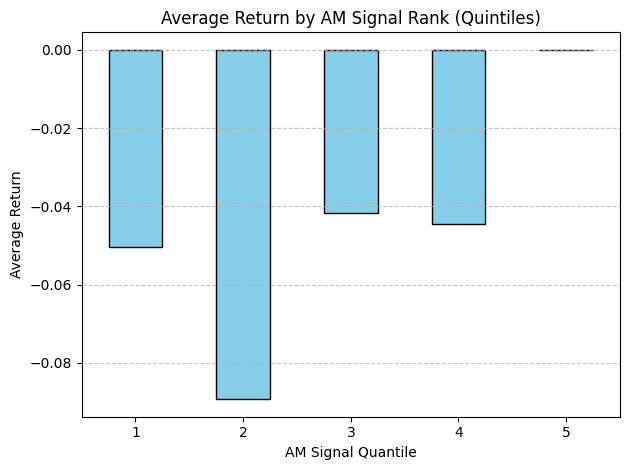

In [33]:
import matplotlib.pyplot as plt

# Plot for AM Signal
am_return_by_quantile.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Return by AM Signal Rank (Quintiles)')
plt.xlabel('AM Signal Quantile')
plt.ylabel('Average Return')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 8: Filter for Large Cap Stocks (Market Cap ≥ $1B)

In this step, I calculate the market capitalization of each stock by multiplying its end-of-month price by the number of shares outstanding. This allows me to filter out micro-cap stocks, which are often more volatile and less liquid. Portfolio managers tend to avoid smaller, harder-to-trade stocks, so this filter better reflects real-world investment strategy.

I merge this large-cap stock list with my original dataset and re-run the AM signal analysis. The goal is to see whether the AM signal still predicts performance effectively even when limited to larger, more investable companies.

In [34]:
import urllib.request

# Define the file URL and the name to save it as
url = "https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/refs/heads/main/data/crsp_2008_2023_prc.csv"
filename = "crsp_2008_2023_prc.csv"

# Download the file
urllib.request.urlretrieve(url, filename)

print("✅ Download complete. File saved as:", filename)

✅ Download complete. File saved as: crsp_2008_2023_prc.csv


In [35]:
prc = pd.read_csv("crsp_2008_2023_prc.csv")
prc.head() 

,PERMNO,date,PRC,SHROUT
0,10001,2008-01-31,14.0000,2875.0
1,10001,2008-02-29,9.4999,4345.0
2,10001,2008-03-31,8.9650,4347.0
3,10001,2008-04-30,8.6000,4347.0
4,10001,2008-05-30,10.9000,4347.0


## Step 8: Filter for Large Cap Stocks (Market Cap ≥ $1B)

To make this analysis more realistic, I filtered out micro-cap stocks by calculating market capitalization using price × shares outstanding. I excluded firms under $1 billion in market cap. 

This simulates a portfolio manager’s constraint to focus on more liquid, tradable stocks. I then re-ran the AM signal analysis on this large-cap subset to see if the signal still performed well.

In [39]:
import urllib.request

url_ret = "https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/crsp_2008_2023_ret.csv"
filename_ret = "crsp_2008_2023_ret.csv"

urllib.request.urlretrieve(url_ret, filename_ret)
print("✅ Return data downloaded successfully.")

✅ Return data downloaded successfully.


In [53]:
signals_2008 = pd.read_csv("signal2008_sample.csv")
signals_2008.rename(columns={'date': 'month'}, inplace=True)
signals_2008['month'] = pd.to_datetime(signals_2008['month'])

In [54]:
crsp = pd.read_csv("crsp_2008_2023_ret.csv")
prc = pd.read_csv("crsp_2008_2023_prc.csv")

crsp.rename(columns={'PERMNO': 'permno', 'date': 'month'}, inplace=True)
crsp['month'] = pd.to_datetime(crsp['month'])

prc.rename(columns={'PERMNO': 'permno', 'date': 'month'}, inplace=True)
prc['month'] = pd.to_datetime(prc['month'])

In [55]:
am_2008 = signals_2008[['permno', 'month', 'AM']]

In [56]:
# Merge AM signal with stock return data
merged = pd.merge(am_2008, crsp[['permno', 'month', 'RET']], on=['permno', 'month'])
merged.rename(columns={'RET': 'ret'}, inplace=True)

In [57]:
# Calculate market cap from PRC and SHROUT
prc['PRC'] = prc['PRC'].abs()
prc['mkt_cap'] = prc['PRC'] * prc['SHROUT'] * 1000

# Keep only necessary columns and filter large cap (≥ $1B)
prc_clean = prc[['permno', 'month', 'mkt_cap']]
large_cap = prc_clean[prc_clean['mkt_cap'] >= 1_000_000_000]

In [59]:
merged_large['ret'] = pd.to_numeric(merged_large['ret'], errors='coerce')

In [60]:
avg_returns_large = merged_large.groupby('quantile')['ret'].mean().reset_index()

In [61]:
# Merge large cap info into original merged dataset
merged_large = pd.merge(merged, large_cap, on=['permno', 'month'], how='inner')

# Assign quantiles for AM signal
merged_large['quantile'] = merged_large.groupby('month')['AM'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
)

# Calculate average returns per quantile
avg_returns_large = merged_large.groupby('quantile')['ret'].mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

### AOP Signal Performance

This chart shows the average return for each AOP signal rank group. The pattern is inconsistent, and there is no clear relationship between rank and return.

In [ ]:
aop_return_by_quantile.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Return by AOP Signal Rank (Quintiles)')
plt.xlabel('AOP Signal Quantile')
plt.ylabel('Average Return')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### AnalystRevision Signal Performance

This chart shows the average return for each AnalystRevision rank group. Interestingly, the highest-ranked group performed the worst, suggesting this signal did not work well in 2008.


In [ ]:
rev_return_by_quantile.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Return by AnalystRevision Signal Rank (Quintiles)')
plt.xlabel('AnalystRevision Signal Quantile')
plt.ylabel('Average Return')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()